In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

2022-06-16 11:56:44.527815: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 11:56:44.527907: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip

--2022-06-16 11:58:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.250.4.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2,5M) [application/zip]
Saving to: ‘happy-or-sad.zip’

happy-or-sad.zip    100%[===================>]   2,55M  1,43MB/s    in 1,8s    

2022-06-16 11:58:04 (1,43 MB/s) - ‘happy-or-sad.zip’ saved [2670333/2670333]



In [4]:
import zipfile

# Unzip validation set
local_zip = './happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./happy-or-sad')

zip_ref.close()

Sample happy image:


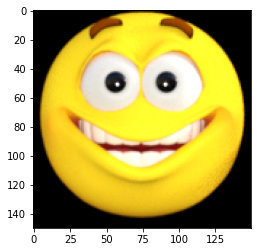


Sample sad image:


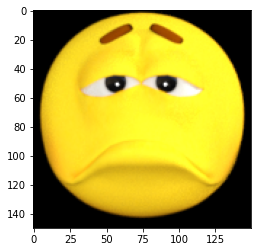

In [7]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "./happy-or-sad/"
happy_dir = os.path.join('./happy-or-sad/happy')
sad_dir = os.path.join('./happy-or-sad/sad')

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()


In [8]:
from tensorflow.keras.preprocessing.image import img_to_array

# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (150, 150, 3)
The maximum pixel value used is: 255.0


In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [10]:
# preprocessing data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GRADED FUNCTION: image_generator
def image_generator():
    ### START CODE HERE

    # Instantiate the ImageDataGenerator class.
    # Remember to set the rescale argument.
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Specify the method to load images from a directory and pass in the appropriate arguments:
    # - directory: should be a relative path to the directory containing the data
    # - targe_size: set this equal to the resolution of each image (excluding the color dimension)
    # - batch_size: number of images the generator yields when asked for a next batch. Set this to 10.
    # - class_mode: How the labels are represented. Should be one of "binary", "categorical" or "sparse".
    #               Pick the one that better suits here given that the labels are going to be 1D binary labels.
    train_generator = train_datagen.flow_from_directory(directory='./happy-or-sad/',
                                                        target_size=(150, 150),
                                                        batch_size=10,
                                                        class_mode="binary")
    ### END CODE HERE

    return train_generator
    

In [11]:
# Save your generator in a variable
gen = image_generator()

Found 80 images belonging to 2 classes.


In [20]:
from tensorflow.keras import optimizers, losses

# GRADED FUNCTION: train_happy_sad_model
def train_happy_sad_model(train_generator):

    # Instantiate the callback
    callbacks = myCallback()

    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        # The second convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The third convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fourth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # The fifth convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        # Flatten the results to feed into a DNN
        tf.keras.layers.Flatten(),
        # 512 neuron hidden layer
        tf.keras.layers.Dense(512, activation='relu'),
        # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    # Compile the model
    # Select a loss function compatible with the last layer of your network
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']) 
    


    # Train the model
    # Your model should achieve the desired accuracy in less than 15 epochs.
    # You can hardcode up to 20 epochs in the function below but the callback should trigger before 15.
    history = model.fit(
        train_generator,
        steps_per_epoch=8,  
        epochs=15,
        verbose=1,
        ) 
    
    ### END CODE HERE
    return history

In [21]:
hist = train_happy_sad_model(gen)

Epoch 1/15
8/8 [==============================] - 2s 170ms/step - loss: 0.6983 - accuracy: 0.5625
Epoch 2/15
8/8 [==============================] - 1s 166ms/step - loss: 0.6719 - accuracy: 0.6125
Epoch 3/15
8/8 [==============================] - 1s 168ms/step - loss: 0.5261 - accuracy: 0.8375
Epoch 4/15
8/8 [==============================] - 1s 170ms/step - loss: 0.3070 - accuracy: 0.9125
Epoch 5/15
8/8 [==============================] - 1s 173ms/step - loss: 0.2452 - accuracy: 0.9000
Epoch 6/15
8/8 [==============================] - 1s 173ms/step - loss: 0.1615 - accuracy: 0.9125
Epoch 7/15
8/8 [==============================] - 1s 169ms/step - loss: 0.1283 - accuracy: 0.9250
Epoch 8/15
8/8 [==============================] - 1s 168ms/step - loss: 0.1439 - accuracy: 0.9375
Epoch 9/15
8/8 [==============================] - 1s 169ms/step - loss: 0.0919 - accuracy: 0.9750
Epoch 10/15
8/8 [==============================] - 1s 169ms/step - loss: 0.1338 - accuracy: 0.9500
Epoch 11/15
8/8 [==